In [1]:
%matplotlib inline

In [1]:
import matplotlib
matplotlib.__version__

'3.3.2'

In [2]:
import requests
from config import weather_api_key

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f864030b7219f496644943da56939fa4


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hihifo
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bellevue
Processing Record 4 of Set 1 | forestville
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | buta
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | staroutkinsk
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | liverpool
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | u

Processing Record 38 of Set 4 | sault sainte marie
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 43 of Set 4 | rock springs
Processing Record 44 of Set 4 | sao felix do xingu
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | chifeng
Processing Record 1 of Set 5 | kayerkan
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | krasnoborsk
Processing Record 4 of Set 5 | haines junction
Processing Record 5 of Set 5 | bar harbor
Processing Record 6 of Set 5 | ler
Processing Record 7 of Set 5 | bin qirdan
Processing Record 8 of Set 5 | morondava
Processing Record 9 of Set 5 | muscat
Processing Record 10 of S

Processing Record 26 of Set 8 | haibowan
City not found. Skipping...
Processing Record 27 of Set 8 | khonuu
City not found. Skipping...
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | comodoro rivadavia
Processing Record 30 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 31 of Set 8 | iquique
Processing Record 32 of Set 8 | tabas
Processing Record 33 of Set 8 | sungaipenuh
Processing Record 34 of Set 8 | batemans bay
Processing Record 35 of Set 8 | barbosa ferraz
Processing Record 36 of Set 8 | grindsted
Processing Record 37 of Set 8 | oistins
Processing Record 38 of Set 8 | dubbo
Processing Record 39 of Set 8 | jega
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | kulachi
Processing Record 42 of Set 8 | antofagasta
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | jaguaruna
Processing Record 45 of Set 8 | samusu
City not found. Skipping...
Processing Record 46 of Set 8 | xining
Proce

Processing Record 11 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 12 of Set 12 | nizwa
Processing Record 13 of Set 12 | kansanshi
Processing Record 14 of Set 12 | khandbari
Processing Record 15 of Set 12 | misasi
Processing Record 16 of Set 12 | vryburg
Processing Record 17 of Set 12 | mahibadhoo
Processing Record 18 of Set 12 | ambon
Processing Record 19 of Set 12 | amantea
Processing Record 20 of Set 12 | mayumba
Processing Record 21 of Set 12 | lincoln
Processing Record 22 of Set 12 | taunggyi
Processing Record 23 of Set 12 | gat
Processing Record 24 of Set 12 | birao
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | tigil
Processing Record 28 of Set 12 | lemesos
City not found. Skipping...
Processing Record 29 of Set 12 | alotau
City not found. Skipping...
Processing Record 30 of Set 12 | papillion
Processing Record 31 of Set 12 | kadykchan
City not found. Skipping...
Processing 

In [11]:
len(city_data)

548

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,87,0,10.36,CL,2021-04-24 13:13:43
1,Bellevue,47.6104,-122.2007,48.99,87,90,9.22,US,2021-04-24 13:10:14
2,Forestville,38.8451,-76.8750,57.20,41,1,4.61,US,2021-04-24 13:15:12
3,Port Alfred,-33.5906,26.8910,74.77,57,15,14.25,ZA,2021-04-24 13:15:12
4,Buta,2.7858,24.7300,81.16,70,100,6.26,CD,2021-04-24 13:15:12


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-04-24 13:13:43,-53.1500,-70.9167,46.40,87,0,10.36
1,Bellevue,US,2021-04-24 13:10:14,47.6104,-122.2007,48.99,87,90,9.22
2,Forestville,US,2021-04-24 13:15:12,38.8451,-76.8750,57.20,41,1,4.61
3,Port Alfred,ZA,2021-04-24 13:15:12,-33.5906,26.8910,74.77,57,15,14.25
4,Buta,CD,2021-04-24 13:15:12,2.7858,24.7300,81.16,70,100,6.26


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/24/21'

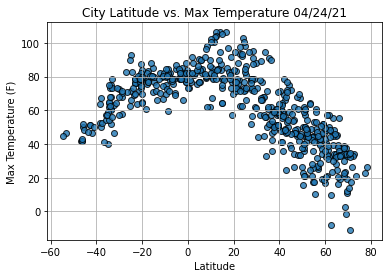

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

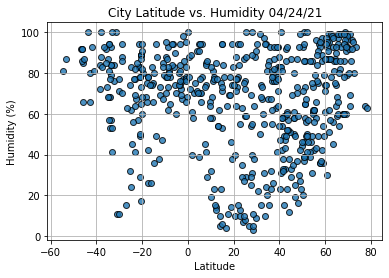

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

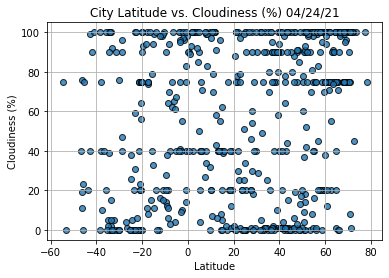

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

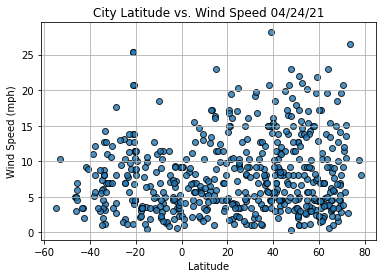

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Isangel
Country                        VU
Date          2021-04-24 13:15:14
Lat                        -19.55
Lng                       169.267
Max Temp                    78.46
Humidity                       80
Cloudiness                     93
Wind Speed                  10.11
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bellevue,US,2021-04-24 13:10:14,47.6104,-122.2007,48.99,87,90,9.22
2,Forestville,US,2021-04-24 13:15:12,38.8451,-76.8750,57.20,41,1,4.61
4,Buta,CD,2021-04-24 13:15:12,2.7858,24.7300,81.16,70,100,6.26
6,Dikson,RU,2021-04-24 13:15:13,73.5069,80.5464,20.80,93,100,26.49
7,Staroutkinsk,RU,2021-04-24 13:15:13,57.2302,59.3348,40.69,94,100,7.16


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
